In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv')

In [3]:
x = data[['radius_mean', 'smoothness_mean']]
y = data[['diagnosis']]

In [4]:
x.head()

,radius_mean,smoothness_mean
0,17.99,0.11840
1,20.57,0.08474
2,19.69,0.10960
3,11.42,0.14250
4,20.29,0.10030


In [5]:
# Check for null values
print(x.isna().sum())

radius_mean        0
smoothness_mean    0
dtype: int64


In [6]:
#stats
x.describe()

,radius_mean,smoothness_mean
count,569.000000,569.000000
mean,14.127292,0.096360
std,3.524049,0.014064
min,6.981000,0.052630
25%,11.700000,0.086370
50%,13.370000,0.095870
75%,15.780000,0.105300
max,28.110000,0.163400


In [7]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [8]:
#Normalize Input
stats = x.describe().T
mu, sigma = stats['mean'], stats['std']

In [9]:
x_norm = (x-mu)/sigma
x_norm.head()

,radius_mean,smoothness_mean
0,1.096100,1.567087
1,1.828212,-0.826235
2,1.578499,0.941382
3,-0.768233,3.280667
4,1.748758,0.280125


In [10]:
rule = lambda val: 1 if val=='M' else 0

In [11]:
y=y['diagnosis'].apply(rule)

In [12]:
y.tail()

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

In [20]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [13]:
HP_epochs = 200
HP_batch_size = 16
HP_lr = 0.001

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x_norm,y,random_state=42)

In [15]:
#celldata = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
#celldata = celldata.shuffle(100).repeat(HP_epochs).batch(HP_batch_size)

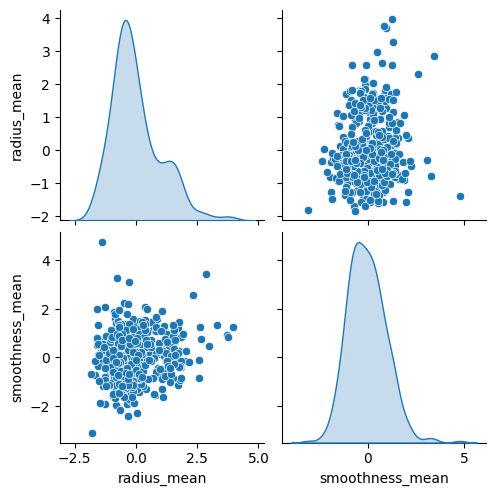

In [17]:
sns.pairplot(xtrain[['radius_mean', 'smoothness_mean']], diag_kind='kde')

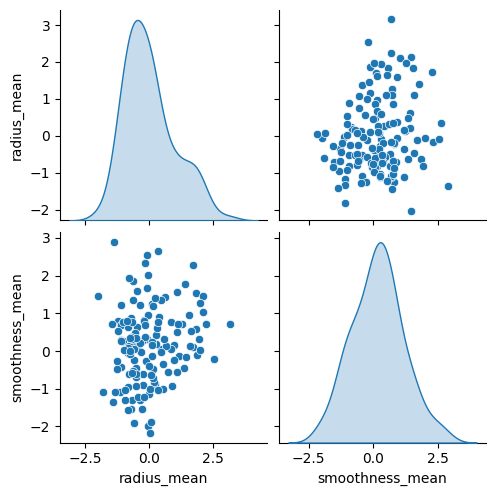

In [19]:
sns.pairplot(xtest[['radius_mean', 'smoothness_mean']], diag_kind='kde')

In [44]:
model = tf.keras.Sequential([
    keras.layers.Dense(1)
])

In [45]:
# Uncomment after you have run the notebook to access 2nd deep model
# model2 = tf.keras.Sequential([
#    keras.layers.Dense(16, activation='relu', input_shape=(2,)), #  INPUT LAYER  -> don't make any changes to this
#    keras.layers.Dense(32, activation='relu'), # in between hidden layers
#    keras.layers.Dense(1) # OUTPUT LAYER -> don't make any changes to this
# ])

# 25, 26, 27 -> 1
# 25.1 or 24.2 -> 0.1

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=HP_lr),
    loss=['mean_absolute_error','mean_squared_error'])

In [47]:
history = model.fit(xtrain, ytrain, epochs=HP_epochs)

Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5301
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5118
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4943
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4770
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4594
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4427
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4270
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4114
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3962
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3816
Epoch 11/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3673
Epoch 12/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 13/200
14/14 [=================

In [32]:
history.history

{'loss': [0.49259161949157715,
  0.44337141513824463,
  0.3983924686908722,
  0.35686641931533813,
  0.3164355456829071,
  0.28000396490097046,
  0.25382092595100403,
  0.2351369559764862,
  0.22176198661327362,
  0.2172132432460785,
  0.21489128470420837,
  0.21309788525104523,
  0.21206453442573547,
  0.2107594758272171,
  0.20929719507694244,
  0.20793993771076202,
  0.20679226517677307,
  0.20583264529705048,
  0.2041734755039215,
  0.2030268758535385,
  0.20189987123012543,
  0.20053453743457794,
  0.1995074301958084,
  0.19834959506988525,
  0.19674897193908691,
  0.19577166438102722,
  0.19466988742351532,
  0.19337452948093414,
  0.19305872917175293,
  0.19209536910057068,
  0.1912592500448227,
  0.19022485613822937,
  0.18969391286373138,
  0.18842945992946625,
  0.18751053512096405,
  0.1868775188922882,
  0.1863839477300644,
  0.1856449395418167,
  0.1848241090774536,
  0.18405452370643616,
  0.18297265470027924,
  0.18270112574100494,
  0.18167778849601746,
  0.181191548705

In [37]:
16*32 + 32

544

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_predictions = model.predict(xtrain)
test_predictions = model.predict(xtest)

5/5 [==============================] - 0s 3ms/step


In [ ]:
train_predictions[:5]

array([[0.16694492],
       [0.23141262],
       [0.17916924],
       [0.70970047],
       [1.0177789 ]], dtype=float32)

In [ ]:
rule = lambda val: 1 if val>=0.5 else 0

In [ ]:
train_predictions = [ rule(prediction) for prediction in train_predictions]
test_predictions = [ rule(prediction) for prediction in test_predictions]

In [ ]:
test_predictions[:5]

[0, 1, 0, 0, 0]

In [ ]:
accuracy_score(train_predictions,ytrain)

0.8474178403755869

In [ ]:
accuracy_score(test_predictions,ytest)

0.8741258741258742

In [ ]:
model.save('first_model.h5')